# WiDS Datathon 2025: Brain Imaging Analysis
## Data Exploration and Feature Selection

This notebook explores the brain imaging data from TRAIN_NEW directory for predicting ADHD diagnosis and biological sex.

In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plotting style and figure size
plt.style.use('default')  # Using default style instead of seaborn
plt.rcParams['figure.figsize'] = (12, 6)

# Define paths
data_dir = Path("/Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/TRAIN_NEW")

# Load the solutions file first to understand our targets
solutions = pd.read_excel(data_dir / "TRAINING_SOLUTIONS.xlsx")

# Display basic information about the solutions file
print("Solutions Data Shape:", solutions.shape)
print("\nFirst few rows:")
print(solutions.head())
print("\nTarget variable distributions:")
print(solutions.describe())

Solutions Data Shape: (1213, 3)

First few rows:
  participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1

Target variable distributions:
       ADHD_Outcome        Sex_F
count   1213.000000  1213.000000
mean       0.685078     0.342951
std        0.464676     0.474891
min        0.000000     0.000000
25%        0.000000     0.000000
50%        1.000000     0.000000
75%        1.000000     1.000000
max        1.000000     1.000000



=== Solutions File Column Names ===
['participant_id', 'ADHD_Outcome', 'Sex_F']

=== First few rows of solutions data ===
  participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1

=== Solutions Data Exploration (Corrected) ===


Basic statistics for each target:
       ADHD_Outcome        Sex_F
count   1213.000000  1213.000000
mean       0.685078     0.342951
std        0.464676     0.474891
min        0.000000     0.000000
25%        0.000000     0.000000
50%        1.000000     0.000000
75%        1.000000     1.000000
max        1.000000     1.000000

Value counts for ADHD_Outcome:
ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

Value counts for Sex_F:
Sex_F
0    797
1    416
Name: count, dtype: int64


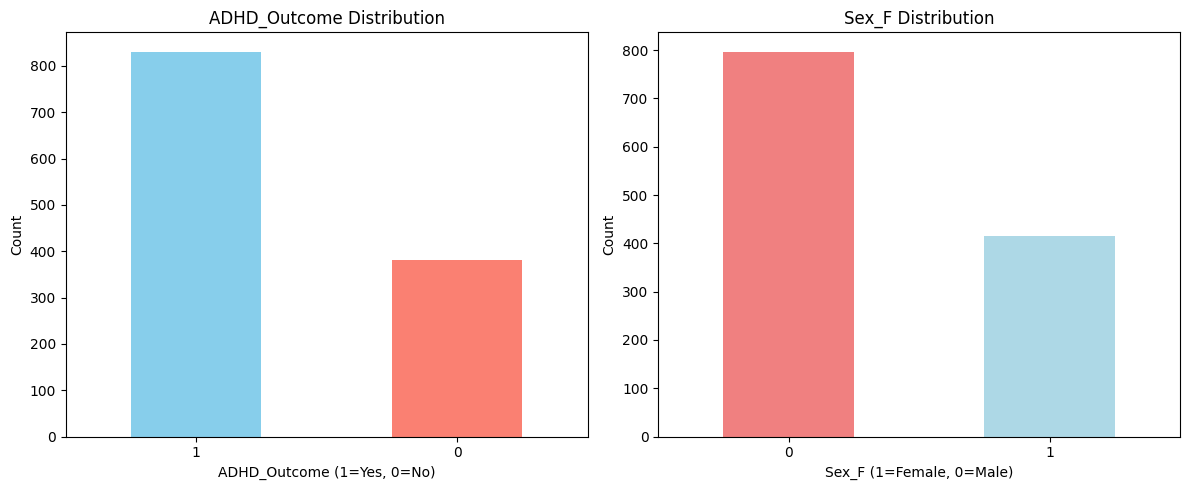

In [ ]:
# First, let's check the actual column names in the solutions file
print("\n=== Solutions File Column Names ===")
print(solutions.columns.tolist())

# Then let's look at the first few rows to see the actual data
print("\n=== First few rows of solutions data ===")
print(solutions.head())# Step 2 (Corrected): Detailed exploration of solutions data

# --- Replace these placeholder names with the actual column names ---
adhd_col = 'ADHD_Outcome'
sex_col = 'Sex_F'
# --------------------------------------------------------------------

print("\n=== Solutions Data Exploration (Corrected) ===\n")

print("\nBasic statistics for each target:")
# Select only the target columns for description
print(solutions[[adhd_col, sex_col]].describe())

print(f"\nValue counts for {adhd_col}:")
print(solutions[adhd_col].value_counts())

print(f"\nValue counts for {sex_col}:")
print(solutions[sex_col].value_counts())

# Visualize target distributions# Step 3: Load and Explore Quantitative Metadata
print("\n=== Quantitative Metadata Exploration ===\n")

# Define the file path
quant_meta_path = data_dir / "TRAIN_QUANTITATIVE_METADATA_new.xlsx"

# Load the quantitative metadata
quant_meta = pd.read_excel(quant_meta_path)

# Display basic information
print("Quantitative Metadata Shape:", quant_meta.shape)
print("\nFirst few rows:")
print(quant_meta.head())

# Check data types and non-null counts
print("\nData Info:")
quant_meta.info()

# Get basic statistics for numerical columns
print("\nBasic Statistics:")
print(quant_meta.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(quant_meta.isnull().sum())
plt.figure(figsize=(12, 5)) # Adjusted figure size slightly

plt.subplot(1, 2, 1)
solutions[adhd_col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(f'{adhd_col} Distribution')
plt.xlabel(f'{adhd_col} (1=Yes, 0=No)') # Assuming 1=Yes, 0=No, adjust if needed
plt.ylabel('Count')
plt.xticks(rotation=0) # Keep labels horizontal

plt.subplot(1, 2, 2)
solutions[sex_col].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title(f'{sex_col} Distribution')
plt.xlabel(f'{sex_col} (1=Female, 0=Male)') # Assuming 1=Female, 0=Male, adjust if needed
plt.ylabel('Count')
plt.xticks(rotation=0) # Keep labels horizontal

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

In [8]:
# Step 3: Load and Explore Quantitative Metadata
print("\n=== Quantitative Metadata Exploration ===\n")

# Define the file path
quant_meta_path = data_dir / "TRAIN_QUANTITATIVE_METADATA_new.xlsx"

# Load the quantitative metadata
quant_meta = pd.read_excel(quant_meta_path)

# Display basic information
print("Quantitative Metadata Shape:", quant_meta.shape)
print("\nFirst few rows:")
print(quant_meta.head())

# Check data types and non-null counts
print("\nData Info:")
quant_meta.info()

# Get basic statistics for numerical columns
print("\nBasic Statistics:")
print(quant_meta.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(quant_meta.isnull().sum())


=== Quantitative Metadata Exploration ===

Quantitative Metadata Shape: (1213, 19)

First few rows:
  participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   00aIpNTbG5uh         100.00                  13.0             3.0   
1   00fV0OyyoLfw          92.27                  14.0             3.0   
2   04X1eiS79T4B          86.67                  14.0             3.0   
3   05ocQutkURd6          93.34                  14.0             3.0   
4   06YUNBA9ZRLq           0.00                  14.0             8.0   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0            15.0             44.0             14.0            20.0   
1            12.0             35.0             25.0            28.0   
2            21.0             37.0             18.0            26.0   
3            11.0             42.0             15.0            20.0   
4            12.0             35.0             22.0            12.0   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduc

In [9]:
# Step 4: Load and Explore Categorical Metadata
print("\n=== Categorical Metadata Exploration ===\n")

# Define the file path
cat_meta_path = data_dir / "TRAIN_CATEGORICAL_METADATA_new.xlsx"

# Load the categorical metadata
cat_meta = pd.read_excel(cat_meta_path)

# Display basic information
print("Categorical Metadata Shape:", cat_meta.shape)
print("\nFirst few rows:")
print(cat_meta.head())

# Check data types and non-null counts
# This helps identify columns that are truly categorical (object type)
print("\nData Info:")
cat_meta.info()

# Get descriptive statistics for object/categorical columns
print("\nBasic Statistics for Categorical Columns:")
# Include 'object' to describe string/categorical columns
# For numerical columns that might represent categories (like IDs), we might need further inspection
print(cat_meta.describe(include=['object']))

# Check for missing values
print("\nMissing Values per Column:")
print(cat_meta.isnull().sum())

# Optional: Check unique values for a few key categorical columns if needed
# Example: print("\nUnique values in 'Example_Column':", cat_meta['Example_Column'].unique())


=== Categorical Metadata Exploration ===

Categorical Metadata Shape: (1213, 10)

First few rows:
  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   00aIpNTbG5uh                     2019                       4   
1   00fV0OyyoLfw                     2017                       1   
2   04X1eiS79T4B                     2017                       1   
3   05ocQutkURd6                     2018                       1   
4   06YUNBA9ZRLq                     2018                       1   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               1.0                          0.0   
1                               0.0                          9.0   
2                               1.0                          2.0   
3                               3.0                          8.0   
4                               0.0                          1.0   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \

In [10]:
# Step 5: Load and Explore Functional Connectome Data
print("\n=== Functional Connectome Data Exploration ===\n")

# Define the file path
connectome_path = data_dir / "TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"

# Load the connectome data (this might take some time)
print(f"Loading connectome data from: {connectome_path}...")
connectome_data = pd.read_csv(connectome_path)
print("Connectome data loaded.")

# Display basic information
print("\nConnectome Data Shape:", connectome_data.shape)
print("\nFirst few rows:")
print(connectome_data.head())

# Check data types and non-null counts
# Expecting mostly numerical (float) types for connectivity values
print("\nData Info (checking first few columns for types):")
# Use .info() but might be slow for many columns, let's check dtypes directly
print(connectome_data.iloc[:, :5].info()) # Info for first 5 columns
print("\nData types of all columns (example):")
print(connectome_data.dtypes.value_counts()) # Count of different data types

# Check for missing values (important!)
print("\nMissing Values per Column (showing columns with any missing values):")
missing_values = connectome_data.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values in connectome data: {missing_values.sum()}")

# Basic statistics for a sample of columns (optional, can be slow)
# print("\nBasic Statistics (sample columns):")
# print(connectome_data.iloc[:, 1:6].describe()) # Describe first 5 feature columns


=== Functional Connectome Data Exploration ===

Loading connectome data from: /Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv...
Connectome data loaded.

Connectome Data Shape: (1213, 19901)

First few rows:
  participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.222930          0.527903          0.429966   
1   WHWymJu6zNZi          0.614765          0.577255          0.496127   
2   4PAQp1M6EyAo         -0.116833          0.458408          0.260703   
3   obEacy4Of68I          0.199688          0.752714          0.658283   
4   s7WzzDcmDOhF          0.227321          0.613268          0.621447   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.060457          0.566489          0.315342          0.508408   
1          0.496606          0.404686          0.439724          0.122590   
2          0.639031          0.769337     

In [11]:
# Step 6: Merge DataFrames

print("\n=== Merging DataFrames ===\n")

# Ensure all dataframes have 'participant_id' as a column (it should be)
# If not, reset index if 'participant_id' is the index

# Check participant IDs are consistent before merging (optional but good practice)
ids_solutions = set(solutions['participant_id'])
ids_quant = set(quant_meta['participant_id'])
ids_cat = set(cat_meta['participant_id'])
ids_connectome = set(connectome_data['participant_id'])

print(f"Participants in solutions: {len(ids_solutions)}")
print(f"Participants in quant_meta: {len(ids_quant)}")
print(f"Participants in cat_meta: {len(ids_cat)}")
print(f"Participants in connectome: {len(ids_connectome)}")
print(f"Common participants (intersection): {len(ids_solutions.intersection(ids_quant, ids_cat, ids_connectome))}")

# Merge solutions with quantitative metadata
print("\nMerging solutions and quantitative metadata...")
merged_data = pd.merge(solutions, quant_meta, on='participant_id', how='inner')
print("Shape after merging with quant_meta:", merged_data.shape)
# Check for duplicate columns (excluding participant_id)
print("Duplicate columns:", merged_data.columns[merged_data.columns.duplicated()].tolist())

# Merge with categorical metadata
print("\nMerging with categorical metadata...")
merged_data = pd.merge(merged_data, cat_meta, on='participant_id', how='inner')
print("Shape after merging with cat_meta:", merged_data.shape)
# Check for duplicate columns again
print("Duplicate columns:", merged_data.columns[merged_data.columns.duplicated()].tolist())


# Merge with connectome data
print("\nMerging with connectome data...")
# It's often safer to specify suffixes if overlapping column names *might* exist,
# though unlikely here besides participant_id which is handled by 'on'.
merged_data = pd.merge(merged_data, connectome_data, on='participant_id', how='inner')
print("Shape after merging with connectome_data:", merged_data.shape)
# Final check for duplicate columns
print("Duplicate columns:", merged_data.columns[merged_data.columns.duplicated()].tolist())


# Display info of the final merged dataframe
print("\nFinal Merged Data Info:")
merged_data.info()

print("\nFirst few rows of final merged data:")
print(merged_data.head())

# Keep only participants present in all datasets
final_ids = ids_solutions.intersection(ids_quant, ids_cat, ids_connectome)
merged_data = merged_data[merged_data['participant_id'].isin(final_ids)].reset_index(drop=True)
print(f"\nShape after ensuring only common participants: {merged_data.shape}")



=== Merging DataFrames ===

Participants in solutions: 1213
Participants in quant_meta: 1213
Participants in cat_meta: 1213
Participants in connectome: 1213
Common participants (intersection): 1213

Merging solutions and quantitative metadata...
Shape after merging with quant_meta: (1213, 21)
Duplicate columns: []

Merging with categorical metadata...
Shape after merging with cat_meta: (1213, 30)
Duplicate columns: []

Merging with connectome data...
Shape after merging with connectome_data: (1213, 19930)
Duplicate columns: []

Final Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19930 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19925), int64(4), object(1)
memory usage: 184.4+ MB

First few rows of final merged data:
  participant_id  ADHD_Outcome  Sex_F  EHQ_EHQ_Total  ColorVision_CV_Score  \
0   UmrK0vMLopoR             1      1          40.00                  13.0   
1   CPaeQkhcjg7d             1      0     

In [13]:
# Check column names in merged dataset
print("All columns in merged_data:")
print(merged_data.columns.tolist())

# Also check the first few rows to see the structure
print("\nFirst few rows of merged_data:")
print(merged_data.head())

All columns in merged_data:
['participant_id', 'ADHD_Outcome', 'Sex_F', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', '0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn', '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn', '0throw_9thcolumn', '0throw_10thcolumn', '0throw_11thcolumn', '0throw_12thcolumn', '0throw_13thcolumn',


=== Data Cleaning and Feature Analysis ===

Number of different feature types:
Connectome features: 19900
Other features: 27

Missing values in non-connectome features:
EHQ_EHQ_Total                        13
ColorVision_CV_Score                 23
APQ_P_APQ_P_CP                       12
APQ_P_APQ_P_ID                       12
APQ_P_APQ_P_INV                      12
APQ_P_APQ_P_OPD                      12
APQ_P_APQ_P_PM                       12
APQ_P_APQ_P_PP                       12
SDQ_SDQ_Conduct_Problems              9
SDQ_SDQ_Difficulties_Total            9
SDQ_SDQ_Emotional_Problems            9
SDQ_SDQ_Externalizing                 9
SDQ_SDQ_Generating_Impact             9
SDQ_SDQ_Hyperactivity                 9
SDQ_SDQ_Internalizing                 9
SDQ_SDQ_Peer_Problems                 9
SDQ_SDQ_Prosocial                     9
MRI_Track_Age_at_Scan               360
PreInt_Demos_Fam_Child_Ethnicity     43
PreInt_Demos_Fam_Child_Race          54
MRI_Track_Scan_Location       

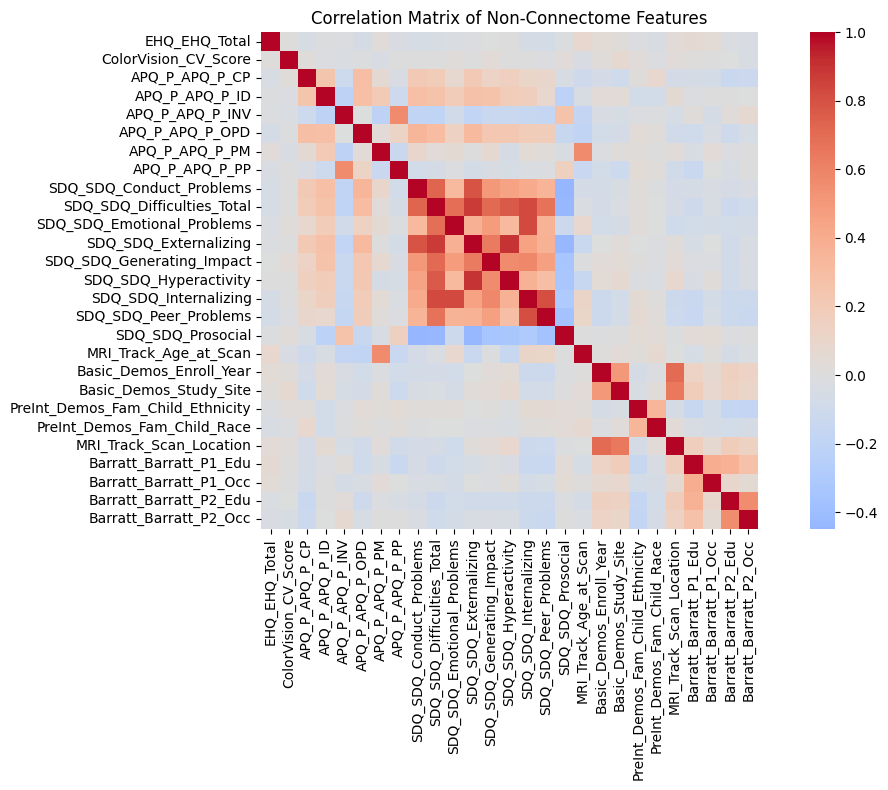


Final dataset dimensions:
Total samples: 1213
Total features: 19927
Connectome features: 19900
Other features: 27


In [15]:
# Step 7: Data Cleaning and Initial Feature Analysis
print("\n=== Data Cleaning and Feature Analysis ===\n")

# 1. Separate features from targets
target_cols = ['ADHD_Outcome', 'Sex_F']  # Adjust these names if they're different in your data
feature_cols = [col for col in merged_data.columns 
               if col not in target_cols and col != 'participant_id']

# 2. Split features into different types
# Assuming connectome features have names containing 'throw' based on earlier exploration
connectome_cols = [col for col in feature_cols if 'throw' in col]
other_feature_cols = [col for col in feature_cols if 'throw' not in col]

print("Number of different feature types:")
print(f"Connectome features: {len(connectome_cols)}")
print(f"Other features: {len(other_feature_cols)}")

# 3. Check missing values
print("\nMissing values in non-connectome features:")
missing_vals = merged_data[other_feature_cols].isnull().sum()
print(missing_vals[missing_vals > 0])

print("\nMissing values in connectome features:")
missing_vals_connectome = merged_data[connectome_cols].isnull().sum()
print(f"Total missing connectome values: {missing_vals_connectome.sum()}")
if missing_vals_connectome.sum() > 0:
    print("Columns with missing values:", missing_vals_connectome[missing_vals_connectome > 0].shape[0])

# 4. Check for constant or near-constant features
print("\nChecking for constant/near-constant features...")
variance = merged_data[feature_cols].nunique()
print("\nFeatures with only one unique value:")
print(variance[variance == 1].index.tolist())
print("\nFeatures with very few unique values (less than 1% of samples):")
few_unique = variance[variance < len(merged_data) * 0.01]
print(few_unique.index.tolist())

# 5. Basic statistics of non-connectome features
print("\nBasic statistics of non-connectome features:")
print(merged_data[other_feature_cols].describe())

# 6. Distribution of target variables (again, with final merged dataset)
print("\nTarget variable distributions in merged dataset:")
for target in target_cols:
    print(f"\n{target} distribution:")
    print(merged_data[target].value_counts(normalize=True))

# 7. Visualize correlations between non-connectome features
plt.figure(figsize=(12, 8))
non_connectome_corr = merged_data[other_feature_cols].corr()
sns.heatmap(non_connectome_corr, 
            cmap='coolwarm', 
            center=0,
            square=True,
            xticklabels=True,
            yticklabels=True)
plt.title('Correlation Matrix of Non-Connectome Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 8. Save the cleaned data dimensions
print("\nFinal dataset dimensions:")
print(f"Total samples: {len(merged_data)}")
print(f"Total features: {len(feature_cols)}")
print(f"Connectome features: {len(connectome_cols)}")
print(f"Other features: {len(other_feature_cols)}")


=== Missing Values Analysis ===

Features with missing values:
                                  Missing Count  Missing Percentage
MRI_Track_Age_at_Scan                       360           29.678483
Barratt_Barratt_P2_Occ                      222           18.301731
Barratt_Barratt_P2_Edu                      198           16.323166
PreInt_Demos_Fam_Child_Race                  54            4.451772
PreInt_Demos_Fam_Child_Ethnicity             43            3.544930
Barratt_Barratt_P1_Occ                       31            2.555647
ColorVision_CV_Score                         23            1.896125
Barratt_Barratt_P1_Edu                       15            1.236603
EHQ_EHQ_Total                                13            1.071723
APQ_P_APQ_P_PP                               12            0.989283
APQ_P_APQ_P_PM                               12            0.989283
APQ_P_APQ_P_OPD                              12            0.989283
APQ_P_APQ_P_INV                              12     

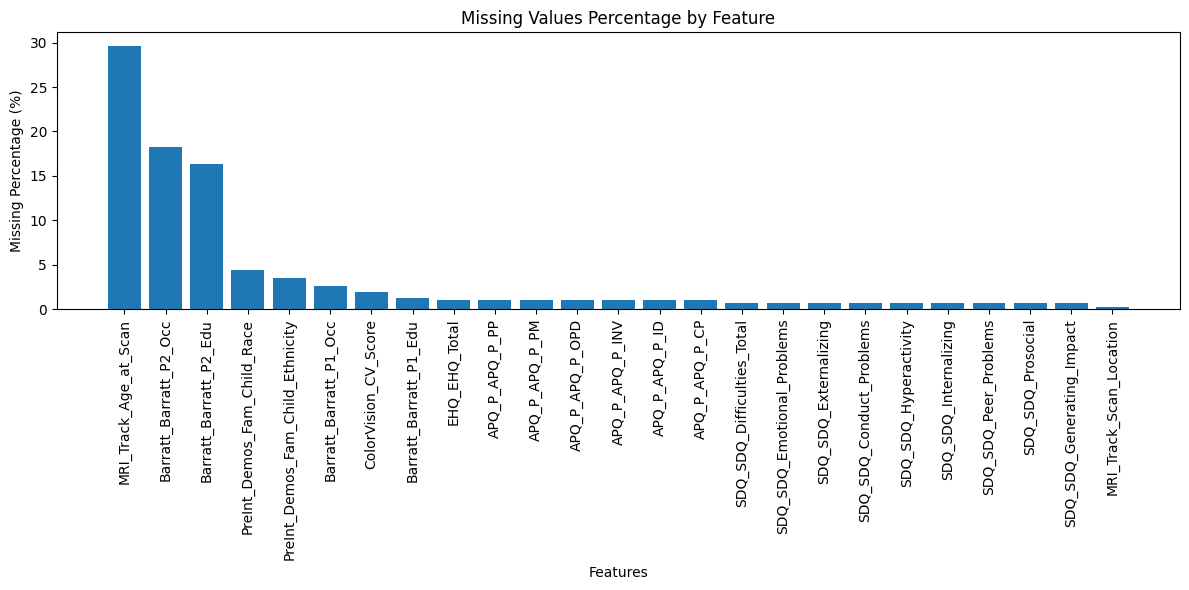


Recommended handling based on missing percentage:

Features to consider dropping (>50% missing):
[]

Features to impute (<=50% missing):
['MRI_Track_Age_at_Scan', 'Barratt_Barratt_P2_Occ', 'Barratt_Barratt_P2_Edu', 'PreInt_Demos_Fam_Child_Race', 'PreInt_Demos_Fam_Child_Ethnicity', 'Barratt_Barratt_P1_Occ', 'ColorVision_CV_Score', 'Barratt_Barratt_P1_Edu', 'EHQ_EHQ_Total', 'APQ_P_APQ_P_PP', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_CP', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'SDQ_SDQ_Generating_Impact', 'MRI_Track_Scan_Location']

Samples with more than 50% missing values: 0


In [16]:
# Detailed Missing Values Analysis
print("\n=== Missing Values Analysis ===\n")

# Calculate missing values statistics
missing_stats = pd.DataFrame({
    'Missing Count': merged_data.isnull().sum(),
    'Missing Percentage': (merged_data.isnull().sum() / len(merged_data)) * 100
})

# Sort by missing percentage in descending order
missing_stats = missing_stats[missing_stats['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

print("Features with missing values:")
print(missing_stats)

# Visualize missing values pattern for features with missing values
plt.figure(figsize=(12, 6))
plt.bar(range(len(missing_stats)), missing_stats['Missing Percentage'])
plt.xticks(range(len(missing_stats)), missing_stats.index, rotation=90)
plt.title('Missing Values Percentage by Feature')
plt.xlabel('Features')
plt.ylabel('Missing Percentage (%)')
plt.tight_layout()
plt.show()

# General rules for handling missing values:
print("\nRecommended handling based on missing percentage:")
print("\nFeatures to consider dropping (>50% missing):")
print(missing_stats[missing_stats['Missing Percentage'] > 50].index.tolist())

print("\nFeatures to impute (<=50% missing):")
print(missing_stats[missing_stats['Missing Percentage'] <= 50].index.tolist())

# Check if any samples have too many missing values
sample_missing_percentage = (merged_data.isnull().sum(axis=1) / merged_data.shape[1]) * 100
print(f"\nSamples with more than 50% missing values: {sum(sample_missing_percentage > 50)}")

In [17]:
# Step 8: Handle Missing Values
print("\n=== Handling Missing Values ===\n")

# Make a copy of the merged data to avoid modifying the original
cleaned_data = merged_data.copy()

# 1. Features with moderate missing values (>10% but <30%)
moderate_missing_features = [
    'MRI_Track_Age_at_Scan',       # 29.7%
    'Barratt_Barratt_P2_Occ',      # 18.3%
    'Barratt_Barratt_P2_Edu'       # 16.3%
]

# 2. Features with low missing values (1-10%)
low_missing_features = [
    'PreInt_Demos_Fam_Child_Race',    # 4.5%
    'PreInt_Demos_Fam_Child_Ethnicity', # 3.5%
    'Barratt_Barratt_P1_Occ',         # 2.6%
    'ColorVision_CV_Score',           # 1.9%
    'Barratt_Barratt_P1_Edu',         # 1.2%
    'EHQ_EHQ_Total'                   # 1.1%
]

# 3. Features with very low missing values (<1%)
very_low_missing_features = [
    'APQ_P_APQ_P_PP', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_INV', 
    'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_CP', 'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Conduct_Problems',
    'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
    'SDQ_SDQ_Generating_Impact', 'MRI_Track_Scan_Location'
]

# Combine all features with missing values
all_missing_features = moderate_missing_features + low_missing_features + very_low_missing_features

# Check data types to determine appropriate imputation method
print("Data types of features with missing values:")
print(cleaned_data[all_missing_features].dtypes)

# Separate numerical and categorical features
numerical_features = []
categorical_features = []

for feature in all_missing_features:
    if cleaned_data[feature].dtype in ['int64', 'float64']:
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

print(f"\nNumerical features to impute: {len(numerical_features)}")
print(f"Categorical features to impute: {len(categorical_features)}")

# Impute numerical features with median (more robust than mean)
for feature in numerical_features:
    median_value = cleaned_data[feature].median()
    cleaned_data[feature].fillna(median_value, inplace=True)
    print(f"Imputed {feature} with median: {median_value}")

# Impute categorical features with mode (most frequent value)
for feature in categorical_features:
    mode_value = cleaned_data[feature].mode()[0]
    cleaned_data[feature].fillna(mode_value, inplace=True)
    print(f"Imputed {feature} with mode: {mode_value}")

# Verify no missing values remain
missing_after = cleaned_data[all_missing_features].isnull().sum()
print("\nMissing values after imputation:")
print(missing_after)

# Check if any missing values remain in the entire dataset
total_missing = cleaned_data.isnull().sum().sum()
print(f"\nTotal missing values in the entire dataset: {total_missing}")


=== Handling Missing Values ===

Data types of features with missing values:
MRI_Track_Age_at_Scan               float64
Barratt_Barratt_P2_Occ              float64
Barratt_Barratt_P2_Edu              float64
PreInt_Demos_Fam_Child_Race         float64
PreInt_Demos_Fam_Child_Ethnicity    float64
Barratt_Barratt_P1_Occ              float64
ColorVision_CV_Score                float64
Barratt_Barratt_P1_Edu              float64
EHQ_EHQ_Total                       float64
APQ_P_APQ_P_PP                      float64
APQ_P_APQ_P_PM                      float64
APQ_P_APQ_P_OPD                     float64
APQ_P_APQ_P_INV                     float64
APQ_P_APQ_P_ID                      float64
APQ_P_APQ_P_CP                      float64
SDQ_SDQ_Difficulties_Total          float64
SDQ_SDQ_Emotional_Problems          float64
SDQ_SDQ_Externalizing               float64
SDQ_SDQ_Conduct_Problems            float64
SDQ_SDQ_Hyperactivity               float64
SDQ_SDQ_Peer_Problems               float6

/var/folders/jf/lmqbdy4d5ss06fddbl0gtdbh0000gq/T/ipykernel_49964/3368892595.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data[feature].fillna(median_value, inplace=True)
/var/folders/jf/lmqbdy4d5ss06fddbl0gtdbh0000gq/T/ipykernel_49964/3368892595.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [19]:
# Step 9: Feature Selection and Dimensionality Reduction
print("\n=== Feature Selection and Dimensionality Reduction ===\n")

# Separate features and targets in the cleaned dataset
X = cleaned_data.drop(['participant_id', 'ADHD_Outcome', 'Sex_F'], axis=1)  # Adjust column names if needed
y_adhd = cleaned_data['ADHD_Outcome']  # Adjust column name if needed
y_female = cleaned_data['Sex_F']  # Adjust column name if needed

print(f"Feature matrix shape: {X.shape}")
print(f"ADHD target shape: {y_adhd.shape}")
print(f"Female target shape: {y_female.shape}")

# Identify connectome features again in the cleaned dataset
connectome_cols = [col for col in X.columns if 'throw' in col]
other_cols = [col for col in X.columns if 'throw' not in col]

print(f"Number of connectome features: {len(connectome_cols)}")
print(f"Number of other features: {len(other_cols)}")


=== Feature Selection and Dimensionality Reduction ===

Feature matrix shape: (1213, 19927)
ADHD target shape: (1213,)
Female target shape: (1213,)
Number of connectome features: 19900
Number of other features: 27



=== Applying PCA to Connectome Features ===

Original connectome features: 19900
PCA components kept: 909
Variance explained: 95.01%


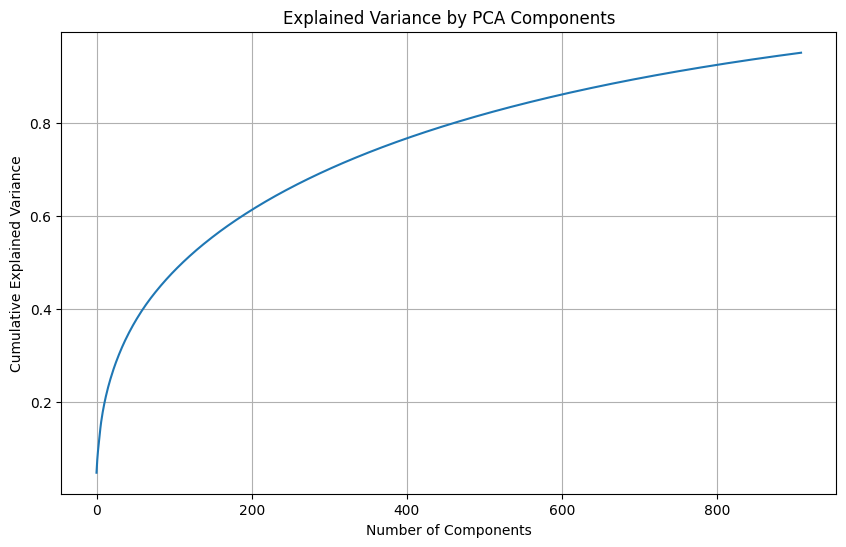

Final feature matrix shape: (1213, 936)


In [20]:
# Step 10: Apply PCA to Connectome Features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("\n=== Applying PCA to Connectome Features ===\n")

# Extract connectome features and other features
X_connectome = X[connectome_cols]
X_other = X[other_cols]

# Standardize connectome features (important before PCA)
scaler = StandardScaler()
X_connectome_scaled = scaler.fit_transform(X_connectome)

# Apply PCA to connectome features
# We'll start by keeping enough components to explain 95% of variance
pca = PCA(n_components=0.95)  # Keep components that explain 95% of variance
X_connectome_pca = pca.fit_transform(X_connectome_scaled)

# Check how many components we ended up with
print(f"Original connectome features: {X_connectome.shape[1]}")
print(f"PCA components kept: {X_connectome_pca.shape[1]}")
print(f"Variance explained: {sum(pca.explained_variance_ratio_) * 100:.2f}%")

# Create DataFrame with PCA components
pca_cols = [f'PCA_component_{i}' for i in range(X_connectome_pca.shape[1])]
X_connectome_pca_df = pd.DataFrame(X_connectome_pca, columns=pca_cols, index=X.index)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Combine PCA components with other features
X_reduced = pd.concat([X_connectome_pca_df, X_other], axis=1)
print(f"Final feature matrix shape: {X_reduced.shape}")

In [21]:
# Step 11: Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

print("\n=== Splitting Data into Training and Testing Sets ===\n")

# Split the data, stratifying by both target variables
# First split by ADHD
X_train, X_temp, y_adhd_train, y_adhd_temp, y_female_train, y_female_temp = train_test_split(
    X_reduced, y_adhd, y_female, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_adhd
)

# Then split the temp set by Female, maintaining the same proportion of ADHD
X_val, X_test, y_adhd_val, y_adhd_test, y_female_val, y_female_test = train_test_split(
    X_temp, y_adhd_temp, y_female_temp,
    test_size=0.5,  # This makes test=15% of original data
    random_state=42,
    stratify=y_female_temp
)

# Check dataset sizes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Verify class balance in splits
print("\nADHD distribution:")
print("Training:", pd.Series(y_adhd_train).value_counts(normalize=True))
print("Validation:", pd.Series(y_adhd_val).value_counts(normalize=True))
print("Testing:", pd.Series(y_adhd_test).value_counts(normalize=True))

print("\nFemale distribution:")
print("Training:", pd.Series(y_female_train).value_counts(normalize=True))
print("Validation:", pd.Series(y_female_val).value_counts(normalize=True))
print("Testing:", pd.Series(y_female_test).value_counts(normalize=True))


=== Splitting Data into Training and Testing Sets ===

Training set: 849 samples
Validation set: 182 samples
Test set: 182 samples

ADHD distribution:
Training: ADHD_Outcome
1    0.685512
0    0.314488
Name: proportion, dtype: float64
Validation: ADHD_Outcome
1    0.686813
0    0.313187
Name: proportion, dtype: float64
Testing: ADHD_Outcome
1    0.681319
0    0.318681
Name: proportion, dtype: float64

Female distribution:
Training: Sex_F
0    0.667845
1    0.332155
Name: proportion, dtype: float64
Validation: Sex_F
0    0.631868
1    0.368132
Name: proportion, dtype: float64
Testing: Sex_F
0    0.631868
1    0.368132
Name: proportion, dtype: float64



=== Building and Evaluating Initial Models ===

Building model for ADHD prediction...

ADHD Model Evaluation:
Accuracy: 0.7857
ROC AUC: 0.7595

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.39      0.53        57
           1       0.78      0.97      0.86       125

    accuracy                           0.79       182
   macro avg       0.81      0.68      0.70       182
weighted avg       0.80      0.79      0.76       182



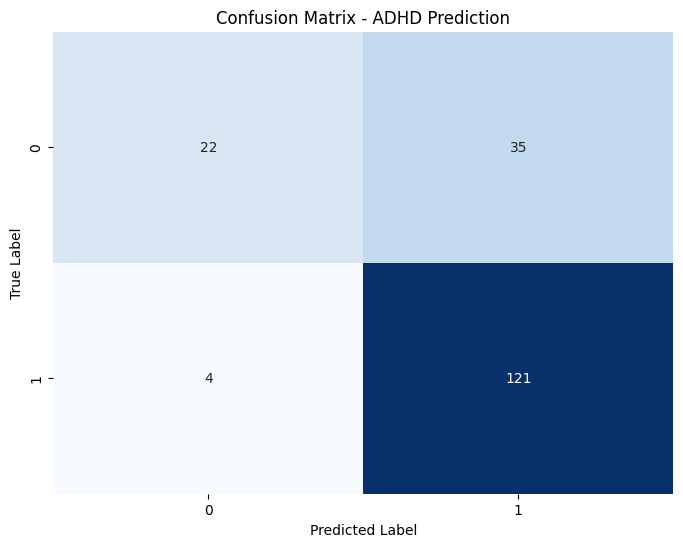


Building model for Female prediction...

Female Model Evaluation:
Accuracy: 0.6319
ROC AUC: 0.5388

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       115
           1       0.00      0.00      0.00        67

    accuracy                           0.63       182
   macro avg       0.32      0.50      0.39       182
weighted avg       0.40      0.63      0.49       182



/Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

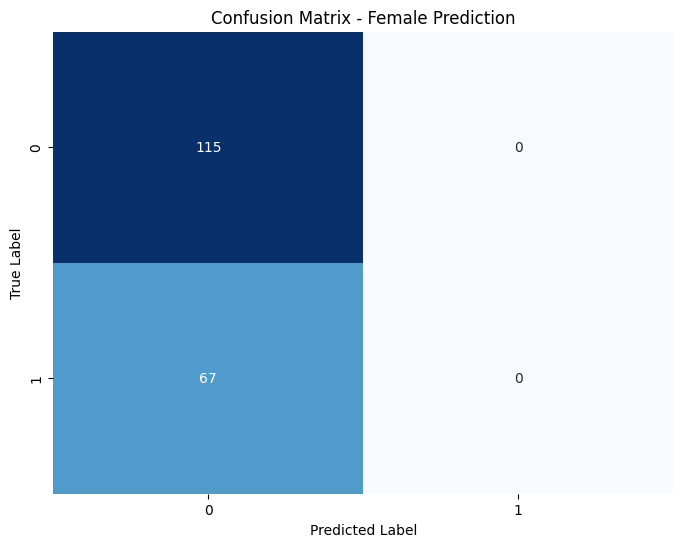

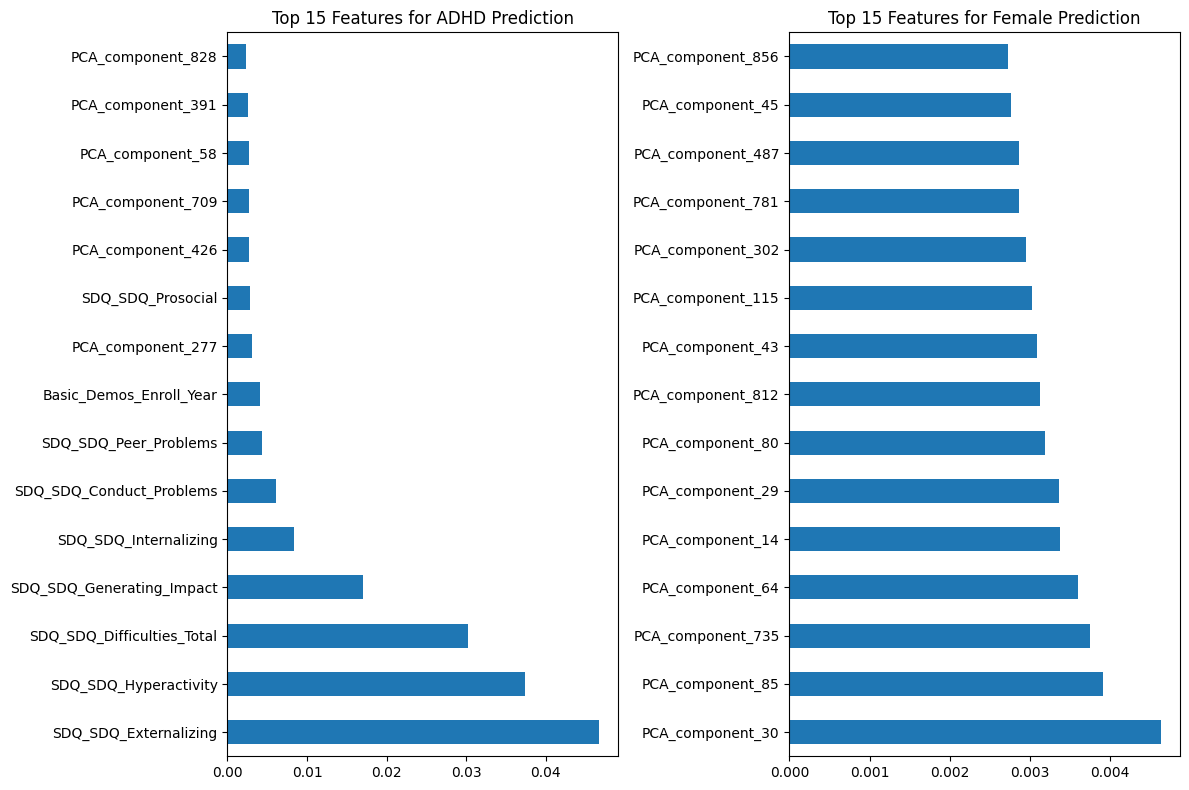

In [22]:
# Step 12: Build and Evaluate Initial Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n=== Building and Evaluating Initial Models ===\n")

# 1. Model for ADHD prediction
print("Building model for ADHD prediction...")
adhd_model = RandomForestClassifier(random_state=42)
adhd_model.fit(X_train, y_adhd_train)

# Make predictions on validation set
y_adhd_pred = adhd_model.predict(X_val)
y_adhd_pred_proba = adhd_model.predict_proba(X_val)[:, 1]

# Evaluate ADHD model
print("\nADHD Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_adhd_val, y_adhd_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_adhd_val, y_adhd_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_adhd_val, y_adhd_pred))

# Plot confusion matrix for ADHD
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_adhd_val, y_adhd_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - ADHD Prediction')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 2. Model for Female prediction
print("\nBuilding model for Female prediction...")
female_model = RandomForestClassifier(random_state=42)
female_model.fit(X_train, y_female_train)

# Make predictions on validation set
y_female_pred = female_model.predict(X_val)
y_female_pred_proba = female_model.predict_proba(X_val)[:, 1]

# Evaluate Female model
print("\nFemale Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_female_val, y_female_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_female_val, y_female_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_female_val, y_female_pred))

# Plot confusion matrix for Female
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_female_val, y_female_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Female Prediction')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Look at feature importance for each model
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
feature_importance_adhd = pd.Series(adhd_model.feature_importances_, index=X_train.columns)
feature_importance_adhd.nlargest(15).plot(kind='barh')
plt.title('Top 15 Features for ADHD Prediction')

plt.subplot(1, 2, 2)
feature_importance_female = pd.Series(female_model.feature_importances_, index=X_train.columns)
feature_importance_female.nlargest(15).plot(kind='barh')
plt.title('Top 15 Features for Female Prediction')

plt.tight_layout()
plt.show()